In [1]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# 获取当前目录
current_dir = os.getcwd()  

# 添加 `interClusLib` 的上级目录到 Python 路径
sys.path.append(os.path.join(current_dir, ".."))

import interClusLib
from interClusLib.data_structure import IntervalData
from interClusLib.similarity_distance import IntervalMetrics
from interClusLib.interval_clustering import *
from interClusLib.visualization import ClusteringVisualization

print("interClusLib Path:", interClusLib.__file__)

random_data = IntervalData.random_data(30, 3)
print("\n Random Interval Data:")
print(random_data.data)
random_data.summary()

interClusLib Path: /Users/jiashuchen/Desktop/InterClusLib/examples/../interClusLib/__init__.py

 Random Interval Data:
    feature_1_lower  feature_1_upper  feature_2_lower  feature_2_upper  \
0         81.972086        90.020053        18.728449        23.149681   
1         30.388788        50.931556        17.133807        85.233162   
2         13.553807        58.009401        16.078270        22.778817   
3         86.620761        92.989143        13.177564        83.354473   
4         50.779911        97.697441        48.816820        66.466235   
5         45.680203        57.000582         1.923598         3.903647   
6         17.249056        46.933856        16.554008        50.772754   
7          5.011306        84.073138        34.354617        75.831661   
8         14.313389        23.411218        60.765255        84.291321   
9          3.695918        39.234848        22.466947        70.004770   
10         9.846493        53.400388         5.249221        96.918

In [13]:
model = IntervalAgglomerativelustering(n_clusters=8, linkage='complete')

model.fit(random_data.get_intervals(),metric='hausdorff',aggregate='mean')

print(model.get_labels())

[1 2 6 0 3 6 2 5 5 5 5 2 3 1 0 3 3 4 5 1 4 2 2 7 0 1 2 2 2 7]


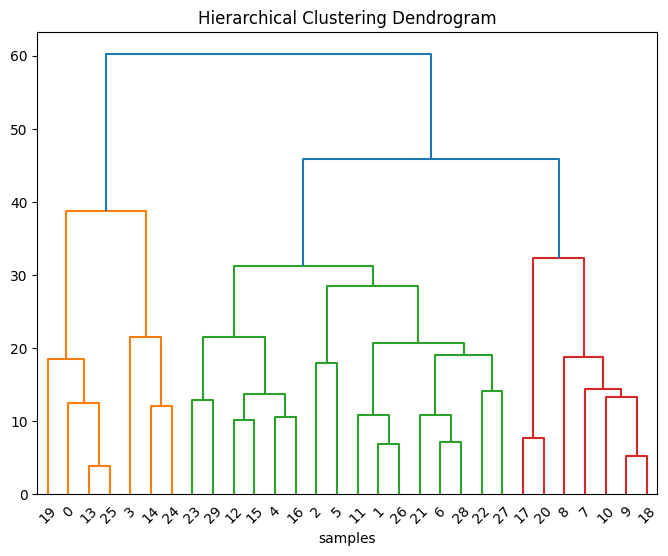

In [14]:
plt.figure(figsize=(8, 6))
ClusteringVisualization.plot_dendrogram(model.model_)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plt.xlabel("samples")
plt.show()